# **Описание работы:**

Анализ продаж - это процесс изучения данных о продажах товаров с целью получения ценной информации и понимания факторов, влияющих на объемы продаж. Он включает в себя исследование количественных и качественных данных, визуализацию результатов и выявление ключевых трендов и паттернов. Анализ продаж помогает компаниям принимать обоснованные бизнес-решения, оптимизировать стратегии маркетинга, управлять ассортиментом товаров, определить приоритеты в управлении запасами и повысить общую эффективность бизнеса. Это позволяет компаниям быть более конкурентоспособными и адаптивными к изменяющимся требованиям рынка.

В ходе анализа продаж ответим на ряд вопросов, таких как:

* Каковы общие тенденции продаж товаров за определенный период времени?
* Какие товары являются наиболее и наименее популярными среди клиентов?
* Какие факторы, такие как цена, сезонность и другие, оказывают наибольшее влияние на объемы продаж?
* Какие товары являются наиболее прибыльными для компании?

### **Основные этапы работы:**

* Загрузка и изучение структуры данных и их предварительная обработка.
* Исследовательский анализ данных (EDA): анализ набора данных, включая визуализации и статистические сводки, необходимые для получения представления о распределении и взаимосвязях между переменными.
* Интерпретация результатов исследования и подведение итогов: извлечение полезной информации из исследования и составление кратких, содержательных выводов.

### **Описание набора данных**:

* Order ID - Идентификатор заказа. Каждый заказ получает свой уникальный идентификатор.
* Product - Продукт (товар), который был продан.
* Quantity Ordered - Заказанное количество товара.
* Price Each - Цена товара. Валюта - Доллар США (знак валюты - $)
* Order Date - Дата заказа товара.
* Purchase Address - Адрес доставки товара.

# Загрузка и изучение структуры данных и их предварительная обработка

In [36]:
import numpy as np                  # Импорт библиотеки NumPy
import pandas as pd                 # Импорт библиотеки Pandas
import seaborn as sns               # Импорт библиотеки SeaBorn
import matplotlib.pyplot as plt     # Импорт библиотеки MatPlotLib
import os                           # Импорт модуля os
import phik                         # Импорт модуля phik
%matplotlib inline               
# Строка для отображения графиков в текущем ноутбуке.

plt.style.use('bmh')                # Устанавлием стиль графиков Bayesian Methods for Hackers по умолчанию

In [2]:
files = [file for file in os.listdir('../input/sales-product-data')]    # Создание списка, содержащий имена файлов в указанной директории

all_months_data = pd.DataFrame()                                        # Создание пустого датафрейма

for file in files:                                                      # Создание цикла
    data = pd.read_csv("../input/sales-product-data/" + file)           # Считывания содержимого CSV-файла
    all_months_data = pd.concat([all_months_data, data])                # Объединение содержимого датафреймов    
    
all_months_data.to_csv("all_data.csv", index=False)                     # Запись датафрейма в CSV-файл

df = pd.read_csv('all_data.csv')                                        # Чтение CSV-файла
df.head(5)                                                              # Отображение нескольких строк датафрейма

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [3]:
df.info()    # Просмотр структуры датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [4]:
df.isna().mean()    # Просмотр доли пустых значений

Order ID            0.002917
Product             0.002917
Quantity Ordered    0.002917
Price Each          0.002917
Order Date          0.002917
Purchase Address    0.002917
dtype: float64

In [5]:
df.describe()    # Просмотр статистических данных

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [6]:
df.query('`Order Date` == "Order Date"')    # Проверка на наличие ложных данных (выбросов)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
211,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
243,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1291,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1412,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1427,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184931,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185070,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185481,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185925,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
df = df.dropna(how = 'all')                   # Удаление строк с пустыми значениями
df = df[df['Order Date'].str[0:2] != 'Or']    # Удаление ложных данных

In [8]:
display(df.isna().mean())    # Проверка структуры датафрейма
df.describe() 

Order ID            0.0
Product             0.0
Quantity Ordered    0.0
Price Each          0.0
Order Date          0.0
Purchase Address    0.0
dtype: float64

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185950,185950,185950,185950,185950,185950
unique,178437,19,9,23,142395,140787
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21903,168552,21903,8,9


In [9]:
df['Quantity Ordered'], df['Price Each'] = df['Quantity Ordered'].astype('int64'), df['Price Each'].astype('float')    # Преобразование типа данных в столбцах
df['Order Date'] = pd.to_datetime(df['Order Date'])    # Преобразование строкового типа данных в тип данных 'datetime' (дата и время)

In [10]:
df['Year'] = df['Order Date'].dt.year                       # Создание столбца только со значением года

df['Month_Number'] = df['Order Date'].dt.month              # Создание столбца только с числовым значением номера месяца

df['Month'] = df['Order Date'].dt.month_name()              # Создание столбца только с названием месяца

df['Day_Number'] = df['Order Date'].dt.dayofweek            # Создание столбца только с числовым значением номера дня недели

df['Day'] = df['Order Date'].dt.day_name()                  # Создание столбца только с названием дня недели

df['Hour'] = df['Order Date'].dt.hour                       # Создание столбца только со значением часа
    
df['Sales'] = df['Quantity Ordered'] * df['Price Each']     # Создание столбца со значением итоговой выручки
    
df['Cities'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])                 # Создание столбца с названиями городов

df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1])    # Создание столбца с названиями штатов

df = df.drop(['Purchase Address'], axis = 1)                # Удаление более не нужного нам столбца из датафрейма

In [11]:
df.groupby('Year')['Order ID'].agg('count')    # Группировка по годам и подсчет количества значений 'Order ID'

Year
2019    185916
2020        34
Name: Order ID, dtype: int64

In [12]:
df = df[df['Order Date'].dt.year != 2020]    # Перезаписываем датафрейм, исключая все года, кроме 2019, чтобы исключить дисбаланс данных.

In [13]:
df.groupby(['Cities','State']).agg('count').reset_index()[['Cities','State']]    # Группировка по городам и штатам

,Cities,State
0,Atlanta,GA
1,Austin,TX
2,Boston,MA
3,Dallas,TX
4,Los Angeles,CA
5,New York City,NY
6,Portland,ME
7,Portland,OR
8,San Francisco,CA
9,Seattle,WA


Как видно выше, в двух разных штатах существуют города с одинаковыми названиями, исправим это.

In [14]:
df.loc[df['State'] == 'ME', 'Cities'] = 'Portland (ME)'    # Изменение названия города с учетом штата, в котором он находится
df.loc[df['State'] == 'OR', 'Cities'] = 'Portland (OR)'

# Исследовательский анализ данных

In [15]:
df.describe()    # Просмотр структуры данных измененного датафрейма

,Quantity Ordered,Price Each,Year,Month_Number,Day_Number,Hour,Sales
count,185916.000000,185916.000000,185916.0,185916.000000,185916.000000,185916.000000,185916.000000
mean,1.124368,184.387720,2019.0,7.060248,2.991663,14.415661,185.478203
std,0.442749,332.722426,0.0,3.502358,2.002106,5.421069,332.911130
min,1.000000,2.990000,2019.0,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019.0,4.000000,1.000000,11.000000,11.950000
50%,1.000000,14.950000,2019.0,7.000000,3.000000,15.000000,14.950000
75%,1.000000,150.000000,2019.0,10.000000,5.000000,19.000000,150.000000
max,9.000000,1700.000000,2019.0,12.000000,6.000000,23.000000,3400.000000


interval columns not set, guessing: ['Quantity Ordered', 'Price Each', 'Month_Number', 'Day_Number', 'Hour', 'Sales']


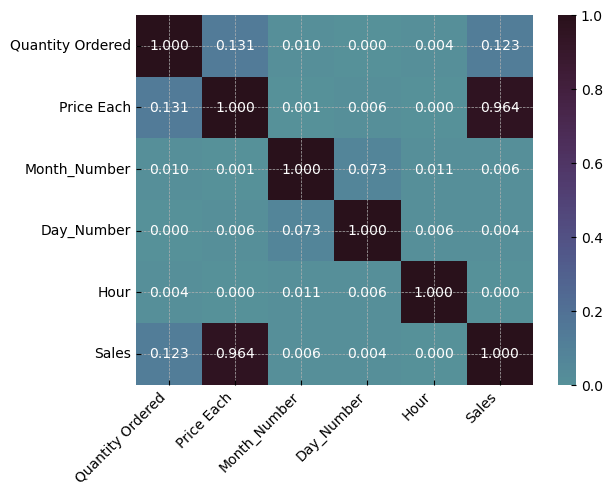

In [16]:
df_matrix = df.drop(['Cities','State','Product','Order ID','Month','Year','Day','Order Date'], axis = 1).phik_matrix()
# Удаление всех неподходящих значений из датафрейма для последующего вычисления матрицы коэффициентов корреляции для заданного набора данных.

cmap = sns.cubehelix_palette(start=1, rot=-1, dark=0.1, light=0.5, as_cmap=True)    # Создание цветовой палитры
sns.heatmap(df_matrix, annot = True, fmt='.3f', cmap = cmap)                        # Визуализация матрицы корреляции
plt.xticks(rotation = 45, ha = 'right')                                             # Устанавливаем поворот делений оси X
plt.show()                                                                          # Отображение матрицы

In [17]:
def proportion_table(Column: str, rd: int)-> pd.DataFrame:

    """
    Создание функции, которая на входе принимает следующие данные:
     - Column - Параметр, который принимает столбец данных для анализа пропорций
     - rd - Параметр, который определяет количество десятичных знаков после округления
    """
    df_gr_count = df.groupby(Column)['Order ID'].agg(['count']).reset_index()                         # Группировка и подсчет значений      
    df_count = df['Order ID'].agg(['count']).reset_index()                                            # Подсчет количества всех заказов
    df_gr_count['proportion'] = (df_gr_count['count'] / df_count['Order ID'].values*100).round(rd)    # Создание столбца со значением доли и его округление
    df_gr_count = df_gr_count.sort_values(by = 'proportion', ascending = False)                       # Сортировка по убыванию
    return display(df_gr_count)                                                                       # Возвращение искомых значений

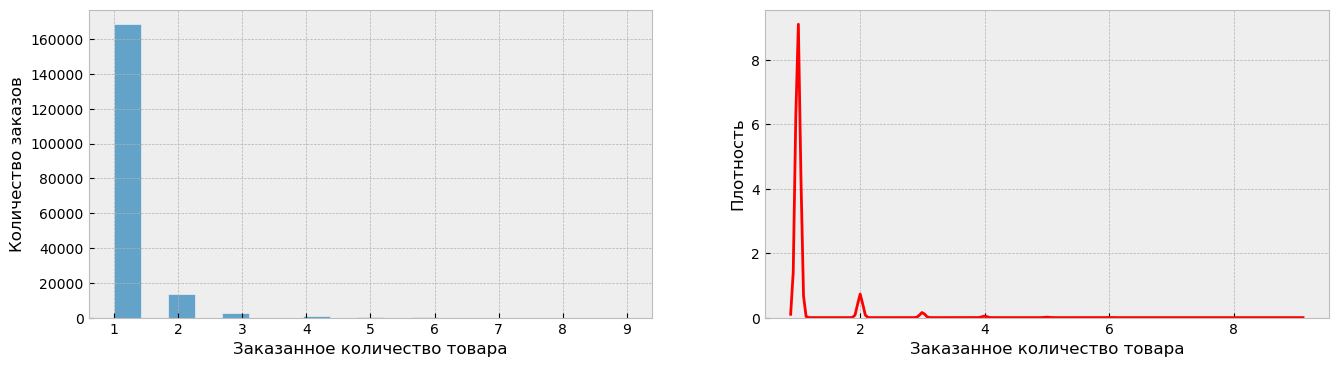

,Quantity Ordered,count,proportion
0,1,168522,90.644
1,2,13322,7.166
2,3,2919,1.570
3,4,805,0.433
4,5,236,0.127
5,6,80,0.043
6,7,24,0.013
7,8,5,0.003
8,9,3,0.002


In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))         # Задаем расположение и размеры графиков на графической сетке

sns.histplot(x = df['Quantity Ordered'], ax = axes[0])              # Создание гистограммы количества купленного товара
axes[0].set_xlabel('Заказанное количество товара')                  # Задаем название оси X
axes[0].set_ylabel('Количество заказов')                            # Задаем название оси Y

sns.kdeplot(df['Quantity Ordered'], ax = axes[1], color = 'red')    # Создание графика плотности распределения (PDF)
axes[1].set_xlabel('Заказанное количество товара')
axes[1].set_ylabel('Плотность')

plt.show()

proportion_table('Quantity Ordered', 3)                             # Вызов функции

В итоге видим, 90,6% товаров куплены в единичном экземпляре. Далее идет резкое уменьшение доли заказанного количества товаров. Так заказы сразу двух товаров составлют около 7%, а трех - всего 1,5%. В целом, основываясь на предоставленных данных, можно сказать, что большинство клиентов предпочитают делать единичные покупки или заказывать небольшие партии товаров, в то время как заказы на большое количество товаров являются крайне редким явлением.

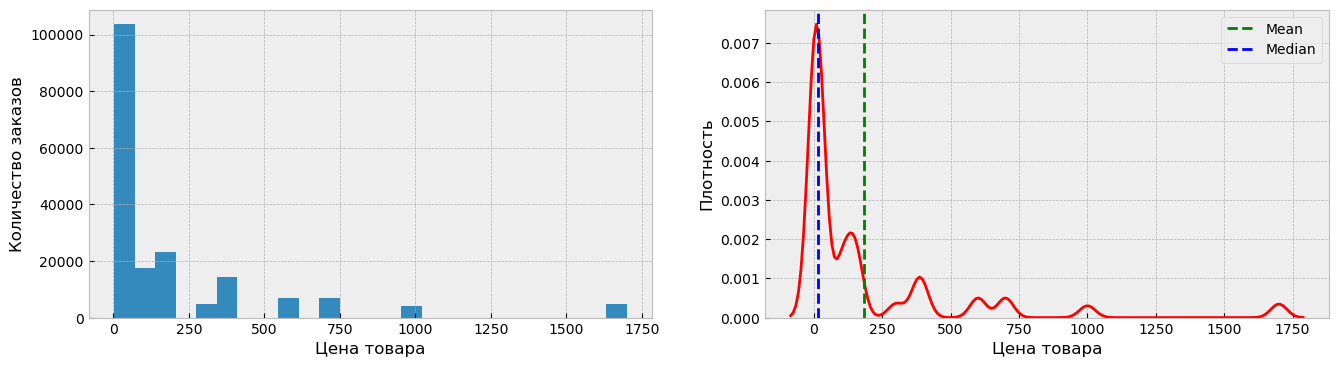

,Price Each,count,proportion
2,11.95,21899,11.78
4,14.95,21653,11.65
0,2.99,20638,11.10
1,3.84,20577,11.07
3,11.99,18881,10.16
8,150.00,15545,8.36
5,99.99,13322,7.17
7,149.99,7504,4.04
13,600.00,6836,3.68
14,700.00,6840,3.68


In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))  

median = df['Price Each'].median()                                    # Находим среднее значения цены товаров
mean = df['Price Each'].mean()                                        # Находим медиану цены товаров  

df['Price Each'].hist(bins = 25, ax = axes[0])                        # Создание гистограммы цены товаров
axes[0].set_xlabel('Цена товара')
axes[0].set_ylabel('Количество заказов')  

sns.kdeplot(df['Price Each'], ax = axes[1], color = 'red')
axes[1].set_xlabel('Цена товара')
axes[1].set_ylabel('Плотность')  
axes[1].axvline(mean, color='g', linestyle='--', label='Mean')        # Определение параметров линии среднего значения на графике
axes[1].axvline(median, color='b', linestyle='--', label='Median')    # Определение параметров линии медианы на графике
axes[1].legend()                                                      # Отображение легенды на графике

plt.show()

proportion_table('Price Each', 2) 

Согласно данным выше, видим что около 55% заказанных товаров имели цену от 2,99 до 14,95. В целом, представленные данные позволяют увидеть распределение цен на товары и их соотношение в общем объеме продаж.

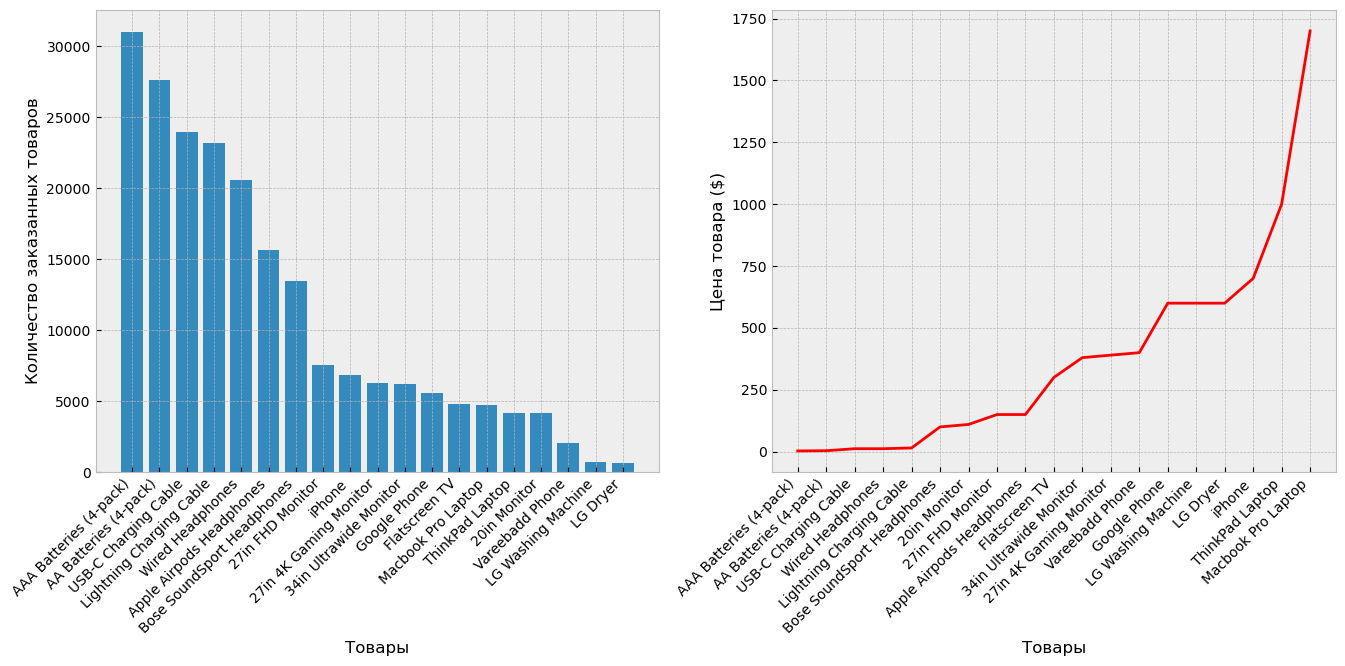

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))                                       

df_sales = df.groupby('Product')['Quantity Ordered'].agg('sum').sort_values(ascending = False)    # Группировка и подсчет количества заказанных продуктов и сортировка по убыванию
df_prices = df.groupby('Product')['Price Each'].mean().sort_values()                              # Группировка по продуктам и сортировка по возрастанию цены

axes[0].bar(df_sales.index, df_sales.values)                                                      # Построение диаграммы количества заказанных продуктов
axes[0].set_xticks(range(len(df_sales.index)))
axes[0].set_xticklabels(df_sales.index, rotation=45, ha='right')
axes[0].set_xlabel('Товары')
axes[0].set_ylabel('Количество заказанных товаров')
                                                                                
axes[1].plot(df_prices.index, df_prices.values, color='red')
axes[1].set_xticks(range(len(df_sales.index)))
axes[1].set_xticklabels(df_prices.index, rotation=45, ha='right')                                 # Построение графика цены товара
axes[1].set_ylabel('Цена товара ($)')
axes[1].set_xlabel('Товары')

plt.show()

Как видно на графике выше, чем ниже цена товара, тем чаще и в большем количестве его покупают. Так, в пятерку самых продаваемых товаров входят батарейки, зарядные устройства и наушники в связи с их относительно небольшой стоимостью. Наименее продаваемые товары, такие как стиральные машины, смартфоны и ноутбуки, имеют значительно большую стоимость соответственно.

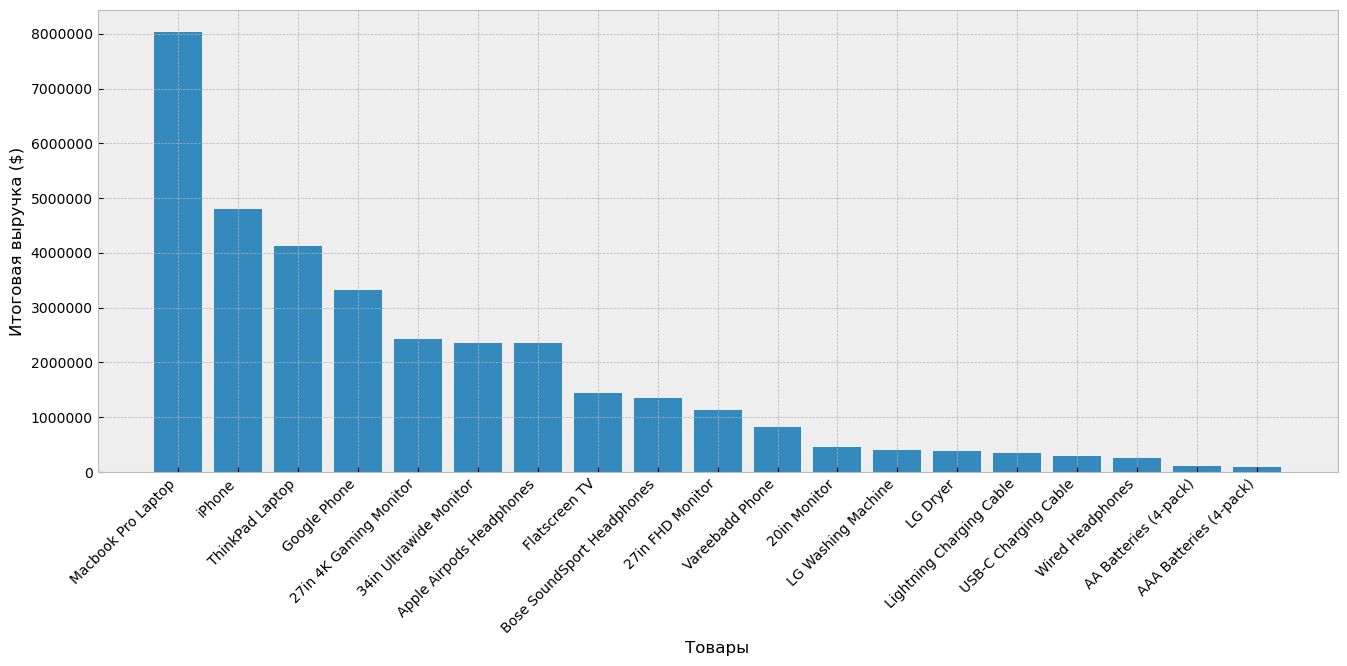

In [21]:
plt.figure(figsize=(16, 6))

df_sales = df.groupby('Product')['Sales'].agg('sum').sort_values(ascending = False)    # Группировка и подсчет итоговой выручки

plt.bar(df_sales.index, df_sales.values)                                               # Создание диаграммы итоговой выручки
plt.xticks(rotation=45, ha = 'right')
plt.ticklabel_format(style='plain', axis='y')                                          # Редактирование формата значений оси Y
plt.xlabel('Товары')
plt.ylabel('Итоговая выручка ($)')
plt.show()

Согласно графику, наиболее прибыльные товары - смартфоны и ноутбуки, а наименее прибыльные - батарейки, зарядные устройства и наушники. Такие значительные отличия объясняются тем, что разница в цене между этими товарами в несколько десятков раз, а количество покупок - всего в несколько раз, что было выяснено ранее.

In [22]:
df.groupby('Year')['Sales'].agg(sum)    # Подсчет суммарной выручки за год

Year
2019    34483365.68
Name: Sales, dtype: float64

In [23]:
# Подсчет доли по количеству заказанных товаров и по итоговой выручки для каждого продукта(товара)
df_p = df.groupby('Product')['Sales'].agg(['count','sum']).reset_index()
df_pc = df['Sales'].agg(['sum']).reset_index()
df_pcf = df['Sales'].agg(['count']).reset_index()
df_p['count_proportion'] = ((df_p['count'] / df_pcf['Sales'].values)*100).round(2)    
df_p['sum_proportion'] = ((df_p['sum'] / df_pc['Sales'].values)*100).round(2)
df_f = df_p.sort_values(by = 'sum_proportion', ascending = False)
df_f

,Product,count,sum,count_proportion,sum_proportion
13,Macbook Pro Laptop,4723,8035900.00,2.54,23.30
18,iPhone,6840,4792900.00,3.68,13.90
14,ThinkPad Laptop,4126,4127958.72,2.22,11.97
9,Google Phone,5524,3318600.00,2.97,9.62
1,27in 4K Gaming Monitor,6229,2434707.57,3.35,7.06
3,34in Ultrawide Monitor,6181,2355558.01,3.32,6.83
6,Apple Airpods Headphones,15545,2348550.00,8.36,6.81
8,Flatscreen TV,4799,1445400.00,2.58,4.19
7,Bose SoundSport Headphones,13322,1345265.46,7.17,3.90
2,27in FHD Monitor,7504,1131974.53,4.04,3.28


Предоставленные данные позволяют выделить три группы товаров относительно их доле продаж и итоговой выручки. Начнем с наиболее значимой группы.

In [24]:
display(df_f.head(7))    # Отображение первой группы

,Product,count,sum,count_proportion,sum_proportion
13,Macbook Pro Laptop,4723,8035900.00,2.54,23.30
18,iPhone,6840,4792900.00,3.68,13.90
14,ThinkPad Laptop,4126,4127958.72,2.22,11.97
9,Google Phone,5524,3318600.00,2.97,9.62
1,27in 4K Gaming Monitor,6229,2434707.57,3.35,7.06
3,34in Ultrawide Monitor,6181,2355558.01,3.32,6.83
6,Apple Airpods Headphones,15545,2348550.00,8.36,6.81


В этой таблице представлены наиболее прибыльные товары, их суммарная выручка состовляет 79,5% от общей итоговой выручки, а доля - 26,5% от общей доли продаж.

In [25]:
display(df_f.iloc[7:12])    # Отображение второй группы

,Product,count,sum,count_proportion,sum_proportion
8,Flatscreen TV,4799,1445400.00,2.58,4.19
7,Bose SoundSport Headphones,13322,1345265.46,7.17,3.90
2,27in FHD Monitor,7504,1131974.53,4.04,3.28
16,Vareebadd Phone,2064,826800.00,1.11,2.40
0,20in Monitor,4099,453818.74,2.20,1.32


Здесь же представлены менее прибыльные товары, которые все еще приносят значимую выручку, которая составляет 15% от общей. Доля продаж около 17,5%.

In [26]:
display(df_f.tail(7))    # Отображение третьей группы

,Product,count,sum,count_proportion,sum_proportion
11,LG Washing Machine,666,399600.00,0.36,1.16
10,LG Dryer,646,387600.00,0.35,1.12
12,Lightning Charging Cable,21653,347004.45,11.65,1.01
15,USB-C Charging Cable,21899,286453.45,11.78,0.83
17,Wired Headphones,18881,246430.47,10.16,0.71
4,AA Batteries (4-pack),20577,106118.40,11.07,0.31
5,AAA Batteries (4-pack),20638,92725.88,11.10,0.27


В этой таблице можно увидеть наименее прибыльные товары, которые имеют наименьшию значимость для бизнеса. При доли продаж 56% - итоговая выручка составляет всего около 5,5% от общей итоговой выручки.

In [27]:
from itertools import combinations    # Импорт функции combinations из модуля itertools
from collections import Counter       # Импорт класса Counter из модуля collections

df_dupl = df[df['Order ID'].duplicated(keep=False)]             # Находим дубликаты среди 'Order ID'
df_dupl = df_dupl[['Order ID','Product']]                       # Сохраняем в датафрейме только нужные столбцы

df_dupl['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))    # Создание столбца со названиями продуктов и группировкой по столбцу 'Order ID' 

df_dupl = df_dupl[['Order ID', 'Grouped']].drop_duplicates()    # Удаление дубликатов по столбцам 'Order ID' и 'Grouped'

count = Counter()                                               # Обьявление переменной
for row in df_dupl['Grouped']:                                  # Создание цикла для нахождения всех комбинаций в столбце 'Grouped' и подсчет их количества
    row_list = row.split(',')                           
    count.update(Counter(combinations(row_list, 2)))    
for key, value in count.most_common(5):                         # Создание цикла для отображения всех комбинаций 
    print(key, value)
    key_comb=list(key)
    key_comb.reverse()
    key_comb = tuple(key_comb)
    print(key_comb, count.get(key_comb))

('iPhone', 'Lightning Charging Cable') 1004
('Lightning Charging Cable', 'iPhone') 10
('Google Phone', 'USB-C Charging Cable') 987
('USB-C Charging Cable', 'Google Phone') 12
('iPhone', 'Wired Headphones') 447
('Wired Headphones', 'iPhone') 15
('Google Phone', 'Wired Headphones') 414
('Wired Headphones', 'Google Phone') 9
('Vareebadd Phone', 'USB-C Charging Cable') 361
('USB-C Charging Cable', 'Vareebadd Phone') 7


В данном списке представлены комбинации товаров и количество заказов, в которых их купили. Чаще всего вместе со смартфонами заказывают зарядные устройства и наушники. Эти сведения могут помочь в настройке рекламных объявлений при покупке того или иного товара для увеличения среднего чека платящего пользователя.

In [28]:
def barplot_date_func(Column_Sort: str, Column: str, size_w: int, size_l: int):

    """
    Создание функции, которая на входе принимает следующие данные:
     - Column_Sort - Параметр, который принимает столбец данных для сортировки
     - Column - Параметр, который принимает столбец данных для построение диаграммы
     - size_w - Параметр, который определяет ширину графика
     - size_l - Параметр, который определяет длину графика
    """
    df_sort_sales = df.sort_values(by = Column_Sort).groupby([Column_Sort,Column])['Sales'].agg('sum').reset_index()

    plt.figure(figsize=(size_w, size_l))
    sns.barplot(x=df_sort_sales[Column], y=df_sort_sales['Sales'])    # Создание диаграммы продаж
    plt.xlabel(Column)
    plt.ylabel('Sales ($)')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()
    return display(df_sort_sales)                                               

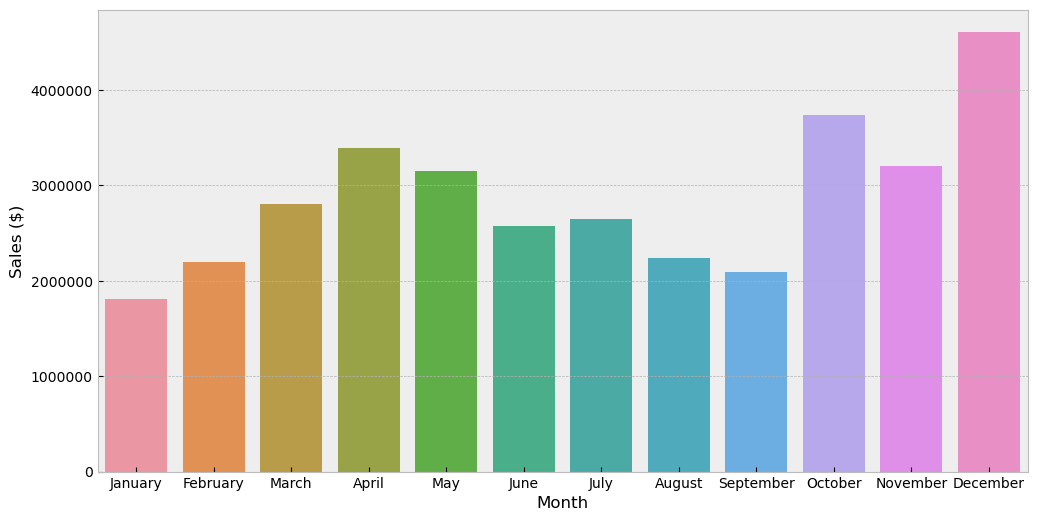

,Month_Number,Month,Sales
0,1,January,1813586.44
1,2,February,2202022.42
2,3,March,2807100.38
3,4,April,3390670.24
4,5,May,3152606.75
5,6,June,2577802.26
6,7,July,2647775.76
7,8,August,2244467.88
8,9,September,2097560.13
9,10,October,3736726.88


In [29]:
barplot_date_func('Month_Number', 'Month', 12, 6)

Исходя из данных выше, видно, что итоговая выручка имеет ярко выраженную сезонность. Декабрь - наиболее прибыльный месяц, причин этому может быть несколько:
* Наличие праздников, таких как Рождество и Новый Год
* Скидки и распродажи
* Бонусы и ежегодные премии

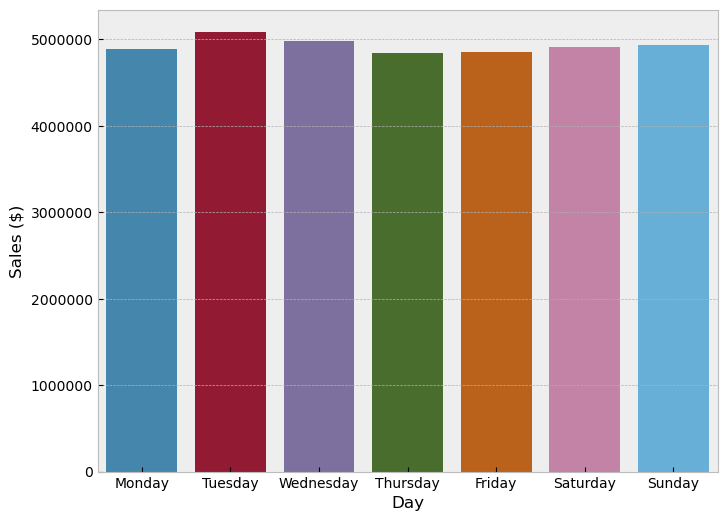

,Day_Number,Day,Sales
0,0,Monday,4883326.72
1,1,Tuesday,5087956.78
2,2,Wednesday,4980151.97
3,3,Thursday,4839465.16
4,4,Friday,4855938.38
5,5,Saturday,4904357.01
6,6,Sunday,4932169.66


In [30]:
barplot_date_func('Day_Number', 'Day', 8, 6)

На протяжении недели общий объем продаж остается относительно стабильным (равномерное распределение). Разница между наивысшим и наименьшим значением выручки незначительна. Нет явного тренда в изменении итоговой выручки в течение недели.

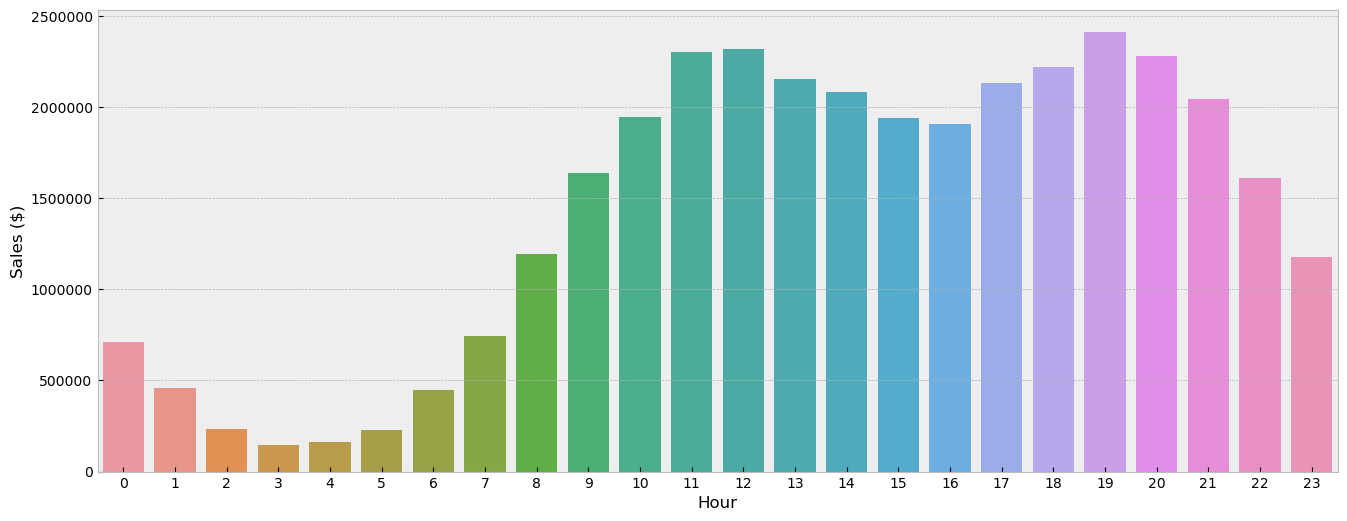

In [31]:
df_hour_sort_sales = df.sort_values(by = 'Hour').groupby(['Hour'])['Sales'].agg('sum').reset_index()   # Создание диаграммы продаж по часам
plt.figure(figsize=(16, 6))
sns.barplot(x=df_hour_sort_sales['Hour'], y=df_hour_sort_sales['Sales'])
plt.xlabel('Hour')
plt.ylabel('Sales ($)')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Основываясь на предоставленных данных, можно утверждать следующее:
* Заметен значительный рост выручки утром и в дневное время (с 6:00 до 13:00). В это время покупатели, возможно, делают покупки перед рабочим днем или в пути на работу.
* Вечерние часы (с 18:00 до 22:00) имеют наибольшие показатели выручки. Это может быть связано с тем, что люди совершают больше покупок в свободное от работы время, что способствует росту спроса.

In [32]:
def barplot_loc_func(Column: str, size_w: int, size_l: int, rot: int, ha: str):

    """
    Создание функции, которая на входе принимает следующие данные:
     - Column - Параметр, который принимает столбец данных для построение диаграммы
     - size_w - Параметр, который определяет ширину графика
     - size_l - Параметр, который определяет длину графика
     - rot - Параметр, который принимает угол поворота делений по оси
     - ha - Параметр, выравнивания значений по горизонтали
    """
    df_sales = df.groupby([Column])['Sales'].agg('sum').reset_index()
    df_sales = df_sales.sort_values(by = 'Sales', ascending = False)
    plt.figure(figsize=(size_w, size_l))
    sns.barplot(x=df_sales[Column], y=df_sales['Sales'])    # Создание диаграммы по продажам
    plt.xlabel(Column)
    plt.ylabel('Sales ($)')
    plt.xticks(rotation=rot, ha = ha)
    plt.ticklabel_format(style='plain', axis='y')
    plt.show() 
    return display(df_sales)                                    

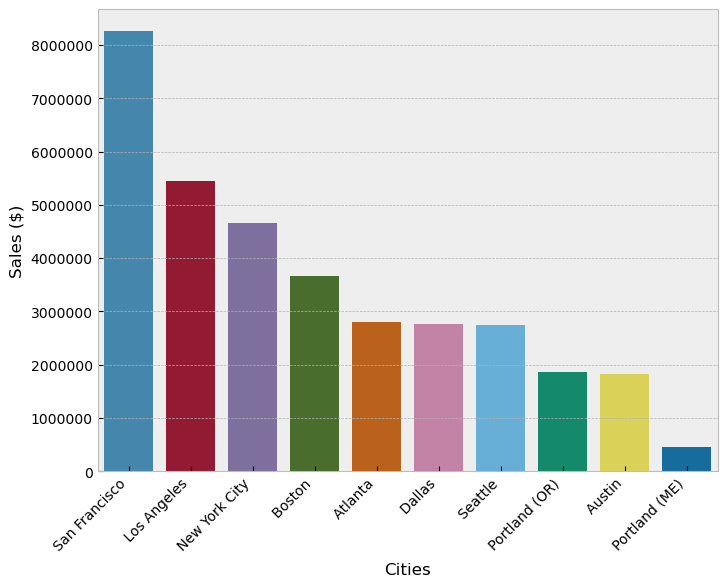

,Cities,Sales
6,San Francisco,8259719.03
4,Los Angeles,5451570.81
5,New York City,4662976.81
2,Boston,3660315.12
0,Atlanta,2795498.58
3,Dallas,2766260.45
7,Seattle,2747605.49
9,Portland (OR),1870579.35
1,Austin,1819081.77
8,Portland (ME),449758.27


In [33]:
barplot_loc_func('Cities', 8, 6, 45, 'right')

San Francisco значительно превосходит другие города в списке по обьему продаж. Этот город генерирует наибольший итоговую выручку, достигая значения 8 259 719 $.

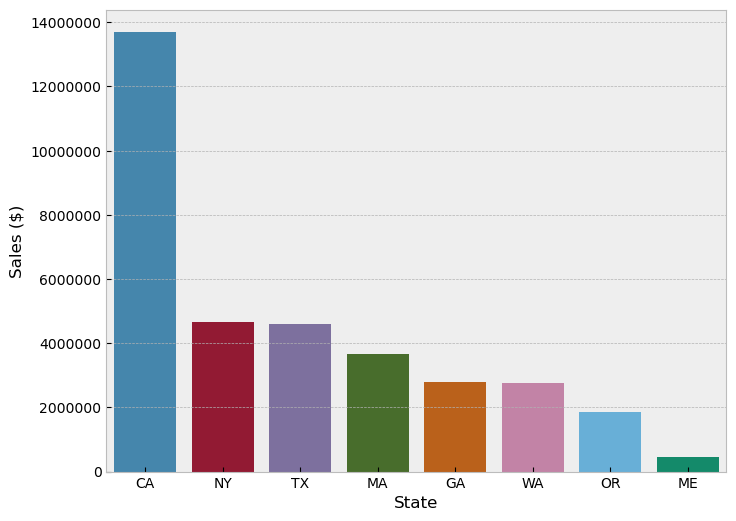

,State,Sales
0,CA,13711289.84
4,NY,4662976.81
6,TX,4585342.22
2,MA,3660315.12
1,GA,2795498.58
7,WA,2747605.49
5,OR,1870579.35
3,ME,449758.27


In [34]:
barplot_loc_func('State', 8, 6, 0, 'center')

Калифорния (CA) имеет самый высокий уровень выручки среди всех штатов в списке. В этот в штат входят два самых прибыльных города - San Francisco и Los Angeles.

# Интерпретация результатов исследования и подведение итогов

В ходе исследования установлено следующее:

Покупательские предпочтения:
* Большинство клиентов предпочитает совершать отдельные покупки или заказывать небольшие партии товаров, поскольку 90,6% товаров были приобретены в единичном экземпляре. При заказе двух и более экземпляров наблюдается резкое уменьшение доли заказов. В итоге можно сделать вывод, что заказы на большое количество товаров являются редким явлением.

Распределение цен на товары:
* Около 55% заказанных товаров имели цену от 2,99 до 14,95 доллара. Это указывает на то, что большинство покупателей предпочитает товары с относительно низкой стоимостью.
* Самые продаваемые товары, такие как батарейки, зарядные устройства и наушники, имеют небольшую стоимость. С другой стороны, товары с высокой стоимостью, такие как смартфоны и ноутбуки, продаются значительно реже. Доля продаж стиральных машин 'LG Washing Machine' и 'LG Dryer' составляет менее 0,5%, что является наименьшим значением среди всех товаров.

Прибыльность товаров:
* В ходе исследования были выделены три группы товаров по их влиянию на суммарную выручку. Так, смартфоны и ноутбуки оказываются наиболее прибыльными товарами, в то время как батарейки, зарядные устройства и наушники являются наименее прибыльными. 'Macbook Pro Laptop' принес наибольшую выручку среди всех ноутбуков - 8 035 900 долларов, а среди смартфонов - 'iPhone' - 4 792 900 долларов.

Сезонность выручки:
* Суммарная выручка за год составляет 34 483 365 долларов.
* Декабрь является наиболее прибыльным месяцем - 4 613 443 доллара. В течение всего года происходят заметные изменения в объеме выручки, что может связано со многими событиями, такими как различного рода праздники, технологические тренды, акции и распродажи.
* В течение недели общий объем продаж остается относительно стабильным, без явного тренда изменения выручки.
* Наблюдается значительное изменение объема продаж в течение дня. Утром и в обеденное время (с 6:00 до 13:00) происходит рост выручки. Наибольшие значения выручки отмечаются вечером (с 18:00 до 22:00). Это объясняется тем, что люди имеют больше свободного времени после окончания рабочего дня и проявляют больший интерес к совершению покупок в этот период. Таким образом, время суток оказывает влияние на объем продаж, при этом утренние и вечерние часы характеризуются более высокими значениями выручки. Эти выводы могут быть полезны для планирования маркетинговых активностей и управления запасами товаров.

Анализ местоположения:
* Исходя из проведенного анализа данных, можно сделать вывод, что город San Francisco является лидером с наивысшей общей выручкой в размере 8 259 719 долларов. Кроме того, штат Калифорния (CA), в котором находятся города San Francisco и Los Angeles, обладает самым высоким уровнем выручки среди всех штатов. Эти результаты подчеркивают важность учета местоположения при анализе и планировании маркетинговых стратегий и распределения ресурсов для максимизации прибыли.